In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynamic_drone import *

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from simulations import simulation, plot_pretty


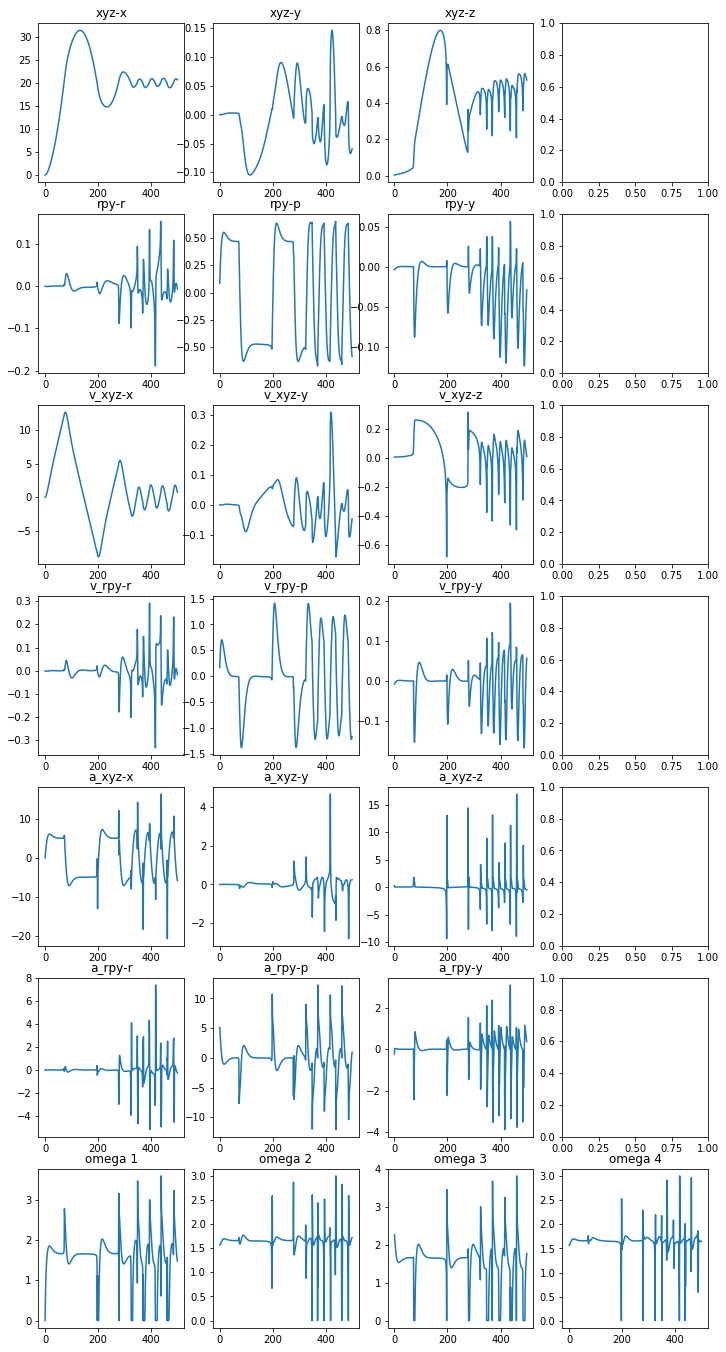

In [17]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 1.0001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

'''
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10
'''

def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 1.0, C=1.0, alpha=0.5):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = C*(t_xyz - xyz)
    
    norm_b = np.sum((xyz - b_xyz)**2)
    norm_g = np.sum((xyz - g_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    g_direc = (xyz - g_xyz)/sigma*np.exp(-norm_g/2/sigma)
    direc = b_direc + o_direc + g_direc
    
    return xyz + direc/ np.linalg.norm(direc) * alpha

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=500)
plot_pretty(res)

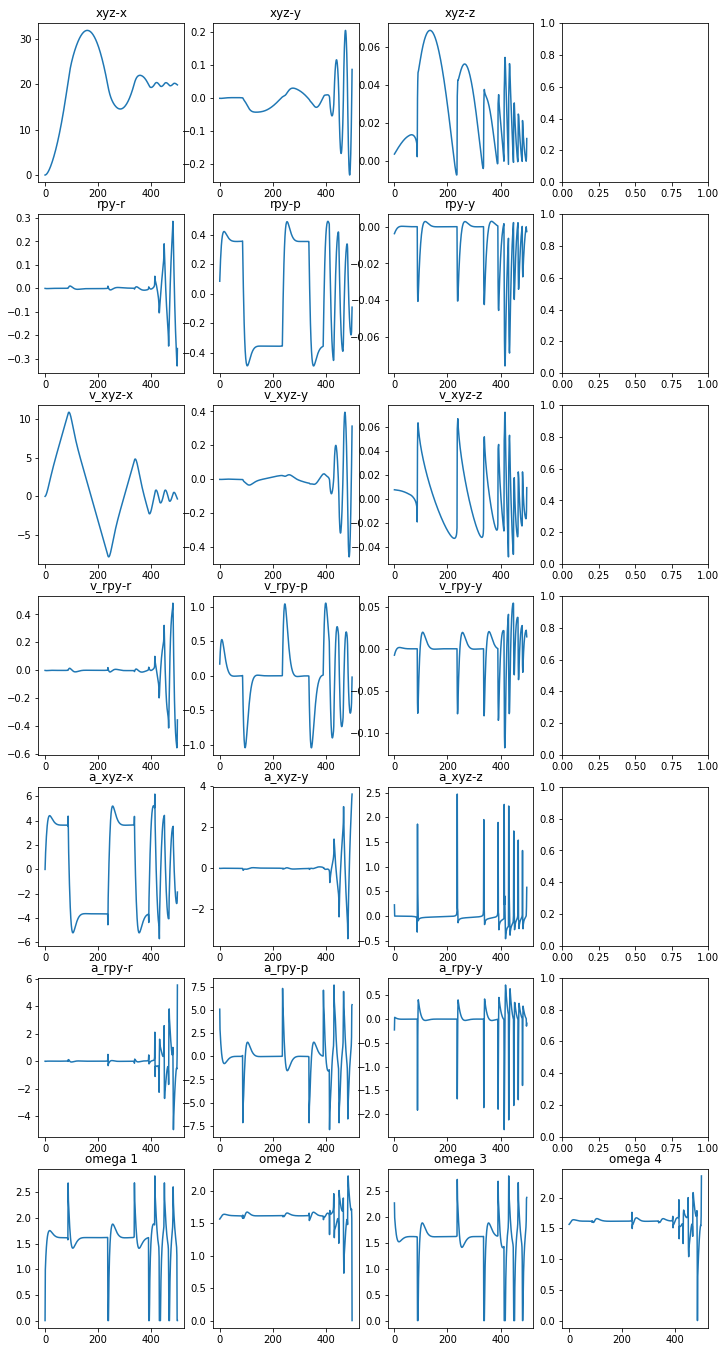

In [27]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.1001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

'''
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10
'''

def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 2.0, C_o=2.0, C_g=0.1, sigma_g=1.0, alpha=0.5):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = t_xyz - xyz
    
    norm_b = np.sum((xyz - b_xyz)**2)
    norm_g = np.sum((xyz - g_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    g_direc = (xyz - g_xyz)/sigma_g*np.exp(-norm_g/2/sigma_g)
    direc = b_direc + C_o * o_direc + C_g * g_direc
    
    return xyz + direc/ np.linalg.norm(direc) * alpha

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=500)
plot_pretty(res)

begin [-1.92874985e-21  0.00000000e+00  0.00000000e+00] [20.  0.  0.] [0.        0.        0.0099995]
begin [-1.92873602e-21  0.00000000e+00  7.30419216e-25] [ 2.0000000e+01  0.0000000e+00 -3.7870357e-03] [0.         0.         0.01378573]
begin [-2.21503199e-21 -1.17390104e-26  8.93446361e-25] [ 1.99860099e+01  5.29228808e-05 -4.02791665e-03] [0.         0.         0.01402654]
begin [-2.80696100e-21 -2.71505790e-26  1.20352225e-24] [ 1.99620235e+01  9.63585545e-05 -4.27135143e-03] [0.        0.        0.0142699]
begin [-3.91002875e-21 -5.03329651e-26  1.77754736e-24] [ 1.99283561e+01  1.27805607e-04 -4.51355327e-03] [0.         0.         0.01451202]
begin [-5.96146250e-21 -8.77690186e-26  2.86723873e-24] [ 1.98853440e+01  1.45539277e-04 -4.75447781e-03] [0.         0.         0.01475287]
begin [-9.90190957e-21 -1.49628099e-25  5.02889843e-24] [ 1.98333439e+01  1.48592001e-04 -4.99407586e-03] [0.         0.         0.01499239]
begin [-1.78276692e-20 -2.49347159e-25  9.54489423e-24] [ 

begin [ 3.82387223e-60 -6.46326468e-63  1.44534022e-62] [-6.71092523  0.02824549 -0.06316365] [0.         0.         0.07296809]
begin [ 1.33775415e-61 -2.33796776e-64  5.04726109e-64] [-6.91107299  0.02955516 -0.0638044 ] [0.         0.         0.07360366]
begin [ 4.85679641e-63 -8.74304552e-66  1.82898866e-65] [-7.10668888  0.0307949  -0.06442094] [0.         0.         0.07421514]
begin [ 1.82935131e-64 -3.38004257e-67  6.87550516e-67] [-7.29794486  0.03196094 -0.06501327] [0.         0.         0.07480252]
begin [ 7.14875834e-66 -1.35129579e-68  2.68130447e-68] [-7.48498346  0.03305103 -0.06558141] [0.         0.         0.07536584]
begin [ 2.89926696e-67 -5.58986604e-70  1.08510346e-69] [-7.66792164  0.03406424 -0.06612541] [0.         0.         0.07590516]
begin [ 1.22100756e-68 -2.39460607e-71  4.55959833e-71] [-7.84685428  0.03500075 -0.06664536] [0.         0.         0.07642056]
begin [ 5.34399757e-70 -1.06340374e-72  1.99093308e-72] [-8.02185733  0.03586175 -0.06714133] [0.

begin [ 3.72220430e-74 -4.76517111e-77  7.06832694e-77] [-8.5470423   0.02374395 -0.03522014] [0.         0.         0.04517393]
begin [ 8.09993733e-73 -1.01775400e-75  1.50439183e-75] [-8.37973094  0.02309406 -0.03413646] [0.         0.         0.04409349]
begin [ 1.84481008e-71 -2.27292909e-74  3.34760551e-74] [-8.2083634   0.02243392 -0.03304103] [0.         0.         0.04300118]
begin [ 4.38834860e-70 -5.29622629e-73  7.77122468e-73] [-8.03293969  0.02176366 -0.03193411] [0.         0.         0.04189726]
begin [ 1.08792598e-68 -1.28474886e-71  1.87781726e-71] [-7.8534598   0.02108343 -0.03081601] [0.         0.         0.04078202]
begin [ 2.80474939e-67 -3.23704366e-70  4.71222223e-70] [-7.66992374  0.02039338 -0.029687  ] [0.         0.         0.03965576]
begin [ 7.50259260e-66 -8.45158921e-69  1.22512076e-68] [-7.48233147  0.01969366 -0.02854742] [0.         0.         0.03851879]
begin [ 2.07757021e-64 -2.28108299e-67  3.29197086e-67] [-7.29068299  0.01898443 -0.02739759] [0.

begin [2.70606079e-06 1.07260189e-08 1.42071866e-08] [ 4.61425116 -0.0213475  -0.02827591] [0.         0.         0.03824789]
begin [1.75002197e-06 6.66012873e-09 8.74618345e-09] [ 4.53111211 -0.02081317 -0.02733217] [0.         0.         0.03730616]
begin [1.09951477e-06 4.01053010e-09 5.21898591e-09] [ 4.4439258  -0.02026603 -0.02637261] [0.         0.         0.03634856]
begin [6.70399794e-07 2.33931834e-09 3.01499802e-09] [ 4.35269016 -0.01970594 -0.02539772] [0.         0.         0.03537555]
begin [3.96227494e-07 1.32011786e-09 1.68410427e-09] [ 4.2574034  -0.01913271 -0.02440803] [0.         0.         0.03438767]
begin [2.26733164e-07 7.19801580e-10 9.08342414e-10] [ 4.15806395 -0.01854618 -0.02340407] [0.         0.         0.03338544]
begin [1.25460219e-07 3.78706694e-10 4.72405302e-10] [ 4.0546705  -0.01794622 -0.02238642] [0.         0.         0.03236944]
begin [6.70436279e-08 1.91985358e-10 2.36546493e-10] [ 3.9472219  -0.01733267 -0.0213557 ] [0.         0.         0.03

begin [1.21313196e-19 1.56992129e-21 3.81046904e-22] [ 0.42852409 -0.12386504 -0.03006418] [0.         0.         0.04003203]
begin [9.61435782e-20 1.22999413e-21 2.66007476e-22] [ 0.40396897 -0.12276495 -0.02655004] [0.         0.         0.03652564]
begin [6.96689051e-20 8.60435022e-22 1.66660209e-22] [ 0.37003903 -0.11893334 -0.02303655] [0.         0.         0.03301853]
begin [4.63458770e-20 5.38253876e-22 9.34401625e-23] [ 0.32725826 -0.11233773 -0.01950168] [0.         0.         0.02948885]
begin [2.84175562e-20 3.00792109e-22 4.65594239e-23] [ 0.27616991 -0.1029241  -0.01593156] [0.         0.         0.02592284]
begin [1.61256323e-20 1.49348641e-22 2.03083209e-23] [ 0.21733074 -0.09060286 -0.01232011] [0.         0.         0.02231455]
begin [8.50311236e-21 6.49435775e-23 7.48699115e-24] [ 0.15131214 -0.07522058 -0.00867177] [0.         0.         0.01866852]
begin [4.18476726e-21 2.38298923e-23 2.11492849e-24] [ 0.07871889 -0.05649611 -0.00501409] [0.        0.        0.0150

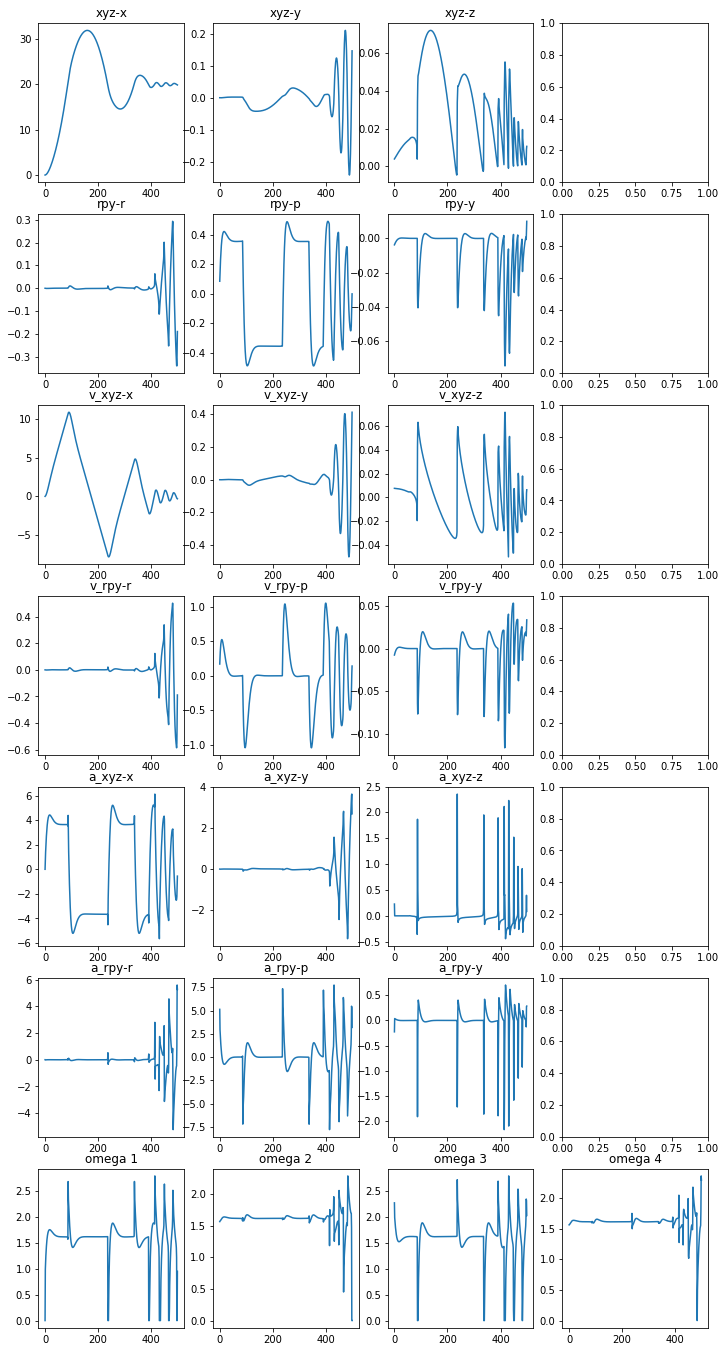

In [28]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.1001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

'''
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10
'''

def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 1.0, C_o=1.0, C_g=0.1, sigma_g=1.0, alpha=0.5):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = t_xyz - xyz
    
    norm_b = np.sum((xyz - b_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    norm_g = np.sum((xyz - g_xyz)**2)
    g_direc = (xyz - g_xyz)/sigma_g*np.exp(-norm_g/2/sigma_g)
    direc = b_direc + C_o * o_direc + C_g * g_direc
    print("begin",b_direc, o_direc, g_direc)
    
    return xyz + direc/ np.linalg.norm(direc) * alpha

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=500)
plot_pretty(res)

begin [-0.00673795  0.          0.        ] [20.  0.  0.] [0.        0.        0.0099995]
begin [-6.73793825e-03  0.00000000e+00  3.43323951e-06] [ 2.00000000e+01  0.00000000e+00 -5.09538583e-03] [0.         0.         0.01509367]
begin [-6.82454355e-03 -4.93789320e-08  3.69174623e-06] [ 1.99857970e+01  7.22521566e-05 -5.40183061e-03] [0.     0.     0.0154]
begin [-7.00413629e-03 -7.11178510e-08  4.02031424e-06] [ 1.99568336e+01  1.01098634e-04 -5.71513722e-03] [0.        0.        0.0157132]
begin [-7.28173084e-03 -6.22480957e-08  4.42565506e-06] [ 1.99133014e+01  8.47441559e-05 -6.02505825e-03] [0.       0.       0.016023]
begin [-7.66594783e-03 -1.76107309e-08  4.92492830e-06] [ 1.98553481e+01  2.26403684e-05 -6.33149138e-03] [0.         0.         0.01632931]
begin [-8.16905323e-03  7.05740563e-08  5.53974786e-06] [ 1.97831218e+01 -8.45183119e-05 -6.63430956e-03] [0.         0.         0.01663201]
begin [-8.80718559e-03  2.13322264e-07  6.29729292e-06] [ 1.96967992e+01 -2.34869940e

begin [ 2.70757694e-09 -3.15423088e-11  2.42536132e-11] [-10.21212412   0.23546406  -0.18105378] [0.         0.         0.18759853]
begin [ 2.45478617e-09 -2.82937711e-11  2.18055590e-11] [-10.26180243   0.23353676  -0.17998306] [0.         0.         0.18658523]
begin [ 2.25134057e-09 -2.56512537e-11  1.98246519e-11] [-10.30555315   0.23135678  -0.17880481] [0.         0.         0.18546944]
begin [ 2.08893504e-09 -2.35090963e-11  1.82284839e-11] [-10.3433447    0.22894616  -0.17752028] [0.         0.         0.18425212]
begin [ 1.96120845e-09 -2.17849420e-11  1.69534546e-11] [-10.37514336   0.22632542  -0.17613073] [0.         0.         0.18293427]
begin [ 1.86334478e-09 -2.04149069e-11  1.59507427e-11] [-10.40091394   0.22351352  -0.17463742] [0.         0.         0.18151686]
begin [ 1.79178129e-09 -1.93499420e-11  1.51833183e-11] [-10.4206204    0.22052793  -0.17304164] [0.         0.         0.18000085]
begin [ 1.74399942e-09 -1.85531166e-11  1.46237505e-11] [-10.43422631   0.21

begin [0.06605583 0.00099516 0.00065692] [ 3.16480656 -0.10297503 -0.06797552] [0.         0.         0.07773883]
begin [0.0614375  0.00086487 0.00056165] [ 3.03174186 -0.09809388 -0.06370244] [0.         0.         0.07350253]
begin [0.05682315 0.00074256 0.00047434] [ 2.89260215 -0.09287834 -0.05933013] [0.        0.        0.0691637]
begin [0.05224568 0.00062922 0.00039524] [ 2.74734768 -0.08734725 -0.0548659 ] [0.         0.         0.06472958]
begin [0.04773827 0.0005256  0.00032443] [ 2.59593815 -0.08151906 -0.0503181 ] [0.         0.         0.06020847]
begin [0.04333379 0.00043216 0.00026187] [ 2.43833289 -0.07541195 -0.04569635] [0.         0.         0.05561003]
begin [0.03906399 0.00034912 0.00020738] [ 2.27449097 -0.06904399 -0.04101186] [0.         0.         0.05094553]
begin [0.03495883 0.00027643 0.00016062] [ 2.10437116 -0.06243342 -0.03627785] [0.         0.         0.04622832]
begin [0.03104574 0.00021384 0.00012119] [ 1.92793178 -0.05559896 -0.03151018] [0.         

begin [ 2.72990020e-03 -6.44195859e-05  3.46703086e-05] [-0.94483578  0.25827383 -0.13900172] [0.         0.         0.14735684]
begin [ 2.51393095e-03 -6.48725766e-05  3.33231621e-05] [-1.02583115  0.28452415 -0.14615181] [0.         0.         0.15425961]
begin [ 2.34971433e-03 -6.45625007e-05  3.08185540e-05] [-1.09177924  0.30476599 -0.14547836] [0.         0.         0.15361045]
begin [ 2.22841859e-03 -6.39485937e-05  2.72585327e-05] [-1.14331736  0.3197781  -0.13630764] [0.         0.         0.14475007]
begin [ 2.14946853e-03 -6.34201933e-05  2.45392674e-05] [-1.17825258  0.32981499 -0.12761579] [0.         0.         0.13631885]
begin [ 2.10943969e-03 -6.31201859e-05  2.24464986e-05] [-1.19644809  0.33502825 -0.11914114] [0.         0.         0.12806875]
begin [ 2.10657869e-03 -6.31173124e-05  2.08373725e-05] [-1.19784303  0.33550978 -0.11076426] [0.         0.         0.11988685]
begin [ 2.14069640e-03 -6.34291323e-05  1.96019090e-05] [-1.18246137  0.33133789 -0.10239546] [0.

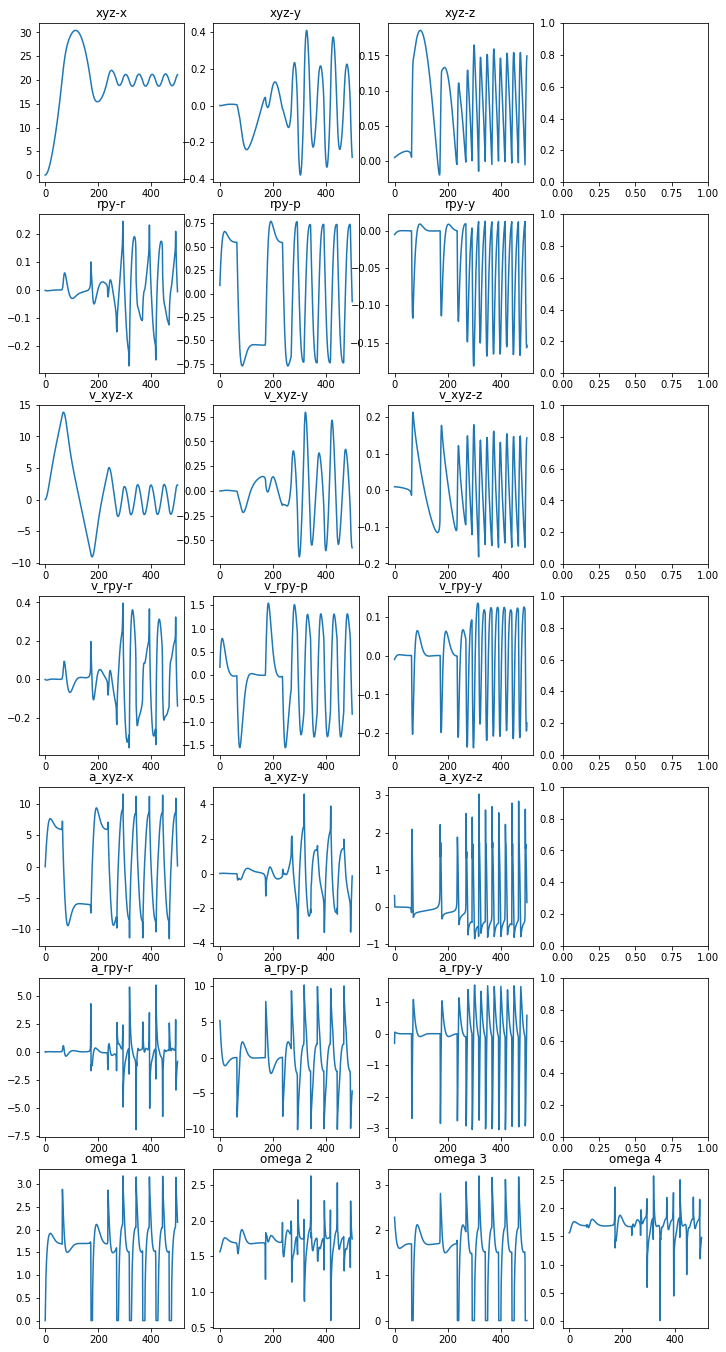

In [42]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.1001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

def xyz_target_arr(xyz, rpy, v_xyz, v_rpy, sigma = 10., C_b=2.0, C_o=1.0, C_g=0.1, sigma_g=1.0, alpha=1.0):
    b_xyz = np.array([10., 0.,0.])
    t_xyz = np.array([20., 0.,0.])
    g_xyz = np.array([xyz[0], xyz[1], -0.01])
    
    o_direc = t_xyz - xyz
    
    norm_b = np.sum((xyz - b_xyz)**2)
    b_direc = (xyz - b_xyz)/sigma*np.exp(-norm_b/2/sigma)
    
    norm_g = np.sum((xyz - g_xyz)**2)
    g_direc = (xyz - g_xyz)/sigma_g*np.exp(-norm_g/2/sigma_g)
    direc = C_b *b_direc + C_o * o_direc + C_g * g_direc
    print("begin",b_direc, o_direc, g_direc)
    
    return xyz + direc/ np.linalg.norm(direc) * alpha

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr,show=[],length=length)
plot_pretty(res)